In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# - Part I

In [2]:
titres = ["TTE.PA", "BN.PA", "SAN.PA", "BNP.PA", "ENGI.PA", "ORA.PA", "MC.PA", "CS.PA", "OR.PA", "GLE.PA"] #titres 2010
data = yf.download(titres, start="2023-01-01", end="2024-01-01", interval="1d") #période et fréquence des données
portfolio_returns = data['Adj Close'].pct_change().mean(axis=1) #portfolio return

[*********************100%%**********************]  10 of 10 completed


In [3]:
data.head()

Price       Adj Close                                                          \
Ticker          BN.PA     BNP.PA      CS.PA    ENGI.PA     GLE.PA       MC.PA   
Date                                                                            
2023-01-02  46.247299  48.110371  23.481457  11.241073  21.710365  676.864197   
2023-01-03  46.597092  49.056286  23.636610  11.201270  22.055971  685.348206   
2023-01-04  47.030830  51.070740  23.977949  10.984011  22.863884  719.674133   
2023-01-05  47.170750  51.333492  23.711971  11.070251  22.836954  710.312561   
2023-01-06  46.307926  51.771420  24.243927  10.735242  22.899790  730.205933   

Price                                                   ...   Volume           \
Ticker           OR.PA    ORA.PA     SAN.PA     TTE.PA  ...    BN.PA   BNP.PA   
Date                                                    ...                     
2023-01-02  322.794617  8.475524  84.858658  55.699268  ...   597864  1815541   
2023-01-03  324.039459  8.596422  85.460297  54.734135  ...  1012176  2816969   
2023-01-04  341.036224  8.854460  85.404762  53.453480  ...  1319109  4045737   
2023-01-05  339.025360  8.929346  83.627617  53.769005  ...  1050165  2872672   
2023-01-06  343.382294  8.923932  84.340332  54.455738  ...  1502257  2907109   

Price                                                                     \
Ticker        CS.PA  ENGI.PA   GLE.PA   MC.PA   OR.PA    ORA.PA   SAN.PA   
Date                                                                       
2023-01-02  2631455  3169475  2587683  194703  182912   4895584  1118828   
2023-01-03  3317412  7563566  3015378  316482  317275   8566945  1793153   
2023-01-04  5214012  8863663  5320056  570725  459088  12227786  1934459   
2023-01-05  3973618  5212006  3920390  327709  343397   7259700  1939509   
2023-01-06  3739597  9011964  2675197  318415  298828   6347578  1356767   

Price                
Ticker       TTE.PA  
Date                 
2023-01-02  3907873  
2023-01-03  5540506  
2023-01-04  7364586  
2023-01-05  5310799  
2023-01-06  4484094  

[5 rows x 60 columns]

In [4]:
# benchmark (CAC 40)

benchmark = yf.download("^FCHI", start="2023-01-01", end="2024-01-01", interval="1d")
benchmark_returns = benchmark['Adj Close'].pct_change() #benchmark return

[*********************100%%**********************]  1 of 1 completed


In [5]:
# Rendement cumulative pour obtenir les perfs cumulées

cumulative_portfolio_returns = (1 + portfolio_returns).cumprod() - 1
cumulative_benchmark_returns = (1 + benchmark_returns).cumprod() - 1

In [6]:
# Appliquons une pondération 

# Répartition égale de 10 % pour chaque titre
weights = np.array([0.10] * len(titres))

# performance annuelle (variation des prix sur l'année)
initial_prices = data['Adj Close'].iloc[0]
final_prices = data['Adj Close'].iloc[-1]
annual_performance = (final_prices - initial_prices) / initial_prices

# DataFrame
summary_df = pd.DataFrame({
    'Ticker': titres,
    'Poids (%)': weights * 100,
    'Performance Annuelle (%)': annual_performance * 100
})

#tableau récapitulatif
summary_df.reset_index(drop=True, inplace=True)
print(summary_df)

    Ticker  Poids (%)  Performance Annuelle (%)
0   TTE.PA       10.0                 22.401846
1    BN.PA       10.0                 21.887567
2   SAN.PA       10.0                 18.315422
3   BNP.PA       10.0                 29.159721
4  ENGI.PA       10.0                  7.014585
5   ORA.PA       10.0                  7.361992
6    MC.PA       10.0                 37.494335
7    CS.PA       10.0                 16.895555
8    OR.PA       10.0                  1.559654
9   GLE.PA       10.0                  6.650468


In [7]:
# Performance finale du portefeuille et du benchmark en pourcentage
portfolio_performance_percent = cumulative_portfolio_returns.iloc[-1] * 100
benchmark_performance_percent = cumulative_benchmark_returns.iloc[-1] * 100

print(f"Performance du Portefeuille sur la période : {portfolio_performance_percent:.2f}%")
print(f"Performance du Benchmark (CAC 40) sur la période : {benchmark_performance_percent:.2f}%")

Performance du Portefeuille sur la période : 18.43%
Performance du Benchmark (CAC 40) sur la période : 14.38%


In [8]:
sectors = {
    'TTE.PA': 'Énergie',
    'BN.PA': 'Consommation',
    'SAN.PA': 'Santé',
    'BNP.PA': 'Finance',
    'ENGI.PA': 'Énergie',
    'ORA.PA': 'Télécommunications',
    'MC.PA': 'Luxe',
    'CS.PA': 'Technologie',
    'OR.PA': 'Consommation',
    'GLE.PA': 'Finance'
}

summary_df['Secteur'] = summary_df['Ticker'].map(sectors)
sector_exposure = summary_df.groupby('Secteur')['Poids (%)'].sum()

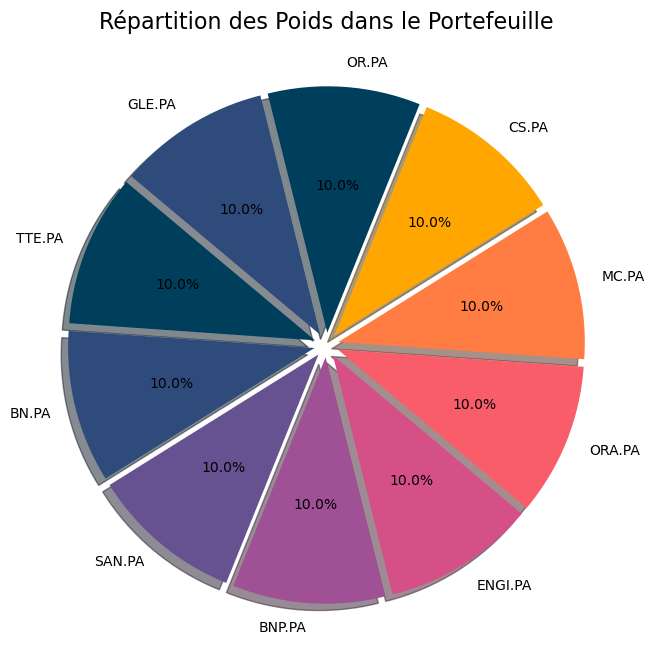

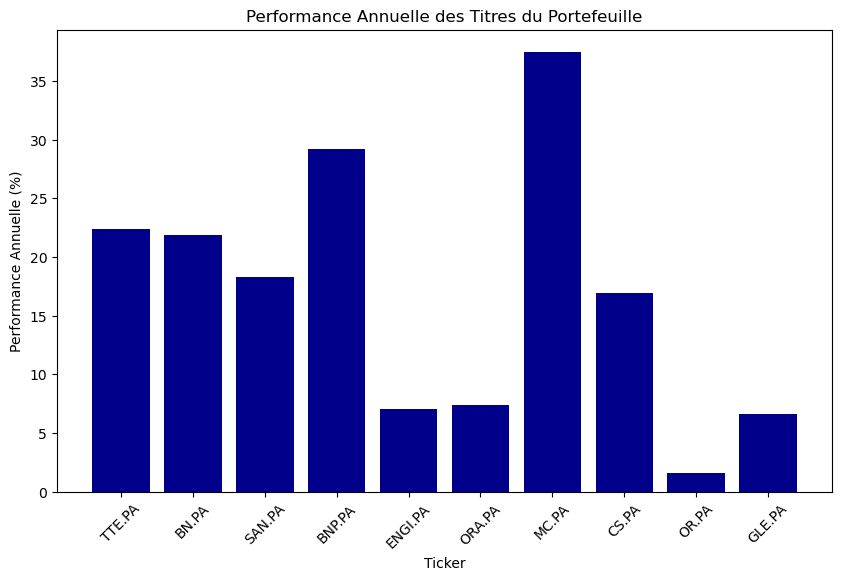

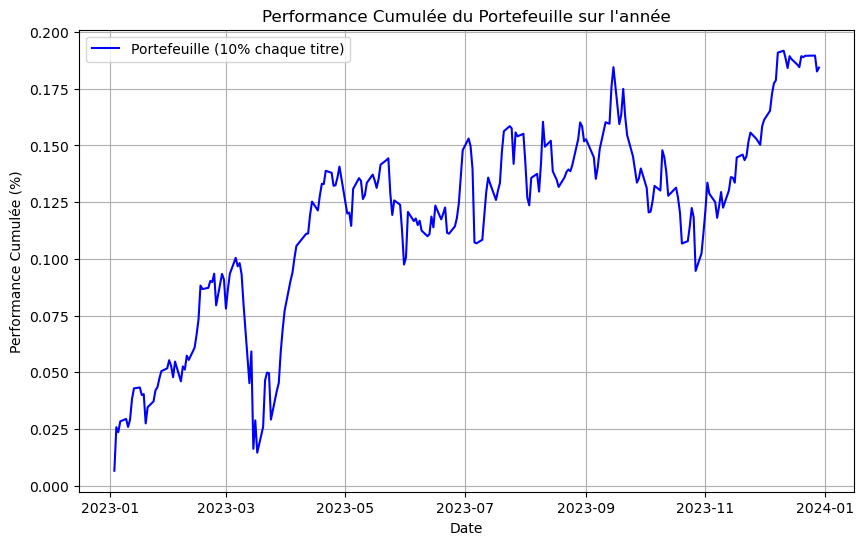

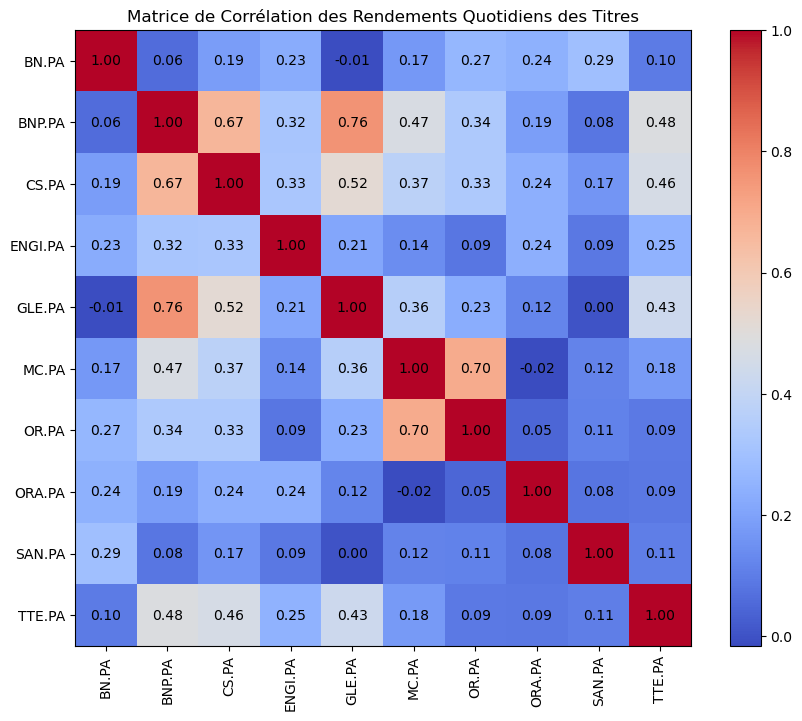

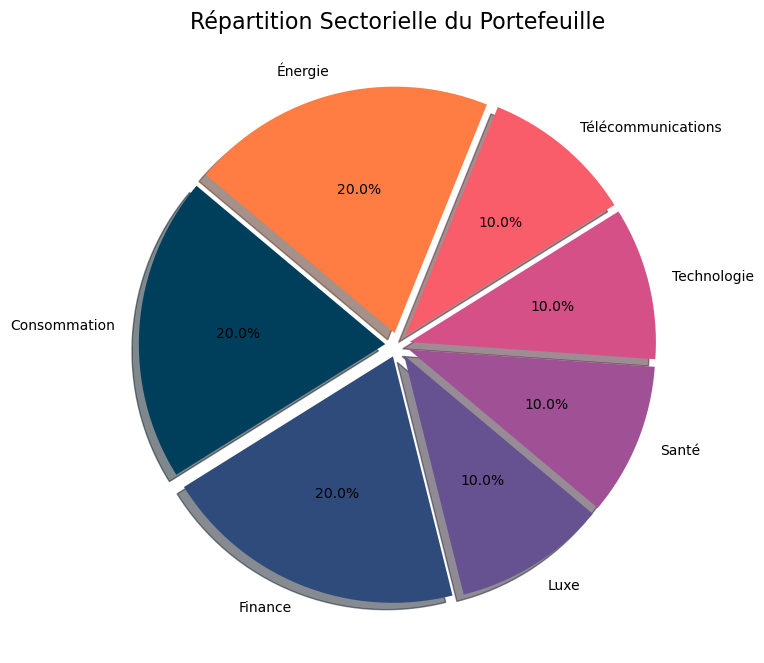

In [9]:
# 1. Diagramme circulaire pour la répartition des poids
colors = ['#003f5c', '#2f4b7c', '#665191', '#a05195', '#d45087', '#f95d6a', '#ff7c43', '#ffa600']
explode = [0.05] * len(summary_df['Poids (%)'])  # Décollage léger pour chaque titre
plt.figure(figsize=(8, 8))
plt.pie(summary_df['Poids (%)'], labels=summary_df['Ticker'], autopct='%1.1f%%', startangle=140,
        colors=colors, shadow=True, explode=explode)
plt.title('Répartition des Poids dans le Portefeuille', fontsize=16)
plt.show()

# 2. Diagramme en barres pour la performance annuelle
plt.figure(figsize=(10, 6))
plt.bar(summary_df['Ticker'], summary_df['Performance Annuelle (%)'], color='darkblue')
plt.title('Performance Annuelle des Titres du Portefeuille')
plt.xlabel('Ticker')
plt.ylabel('Performance Annuelle (%)')
plt.xticks(rotation=45)
plt.show()

# 3. Graphique de performance cumulée (si vous avez les rendements quotidiens)
portfolio_cumulative_returns = (1 + portfolio_returns).cumprod() - 1
plt.figure(figsize=(10, 6))
plt.plot(portfolio_cumulative_returns, label='Portefeuille (10% chaque titre)', color='blue')
plt.title('Performance Cumulée du Portefeuille sur l\'année')
plt.xlabel('Date')
plt.ylabel('Performance Cumulée (%)')
plt.legend()
plt.grid(True)
plt.show()

# Matrice de corrélation
adj_close_data = data['Adj Close']
returns = adj_close_data.pct_change()
corr_matrix = returns.corr()
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)

# Display number on matrix
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix.columns)):
        plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')
plt.title('Matrice de Corrélation des Rendements Quotidiens des Titres')
plt.grid(False)
plt.show()

# Palette de couleurs professionnelle
explode = [0.05] * len(sector_exposure)  # Décollage léger de chaque secteur
plt.figure(figsize=(8, 8))
plt.pie(sector_exposure, labels=sector_exposure.index, autopct='%1.1f%%', startangle=140,
        colors=colors, shadow=True, explode=explode)
plt.title('Répartition Sectorielle du Portefeuille', fontsize=16)
plt.show()

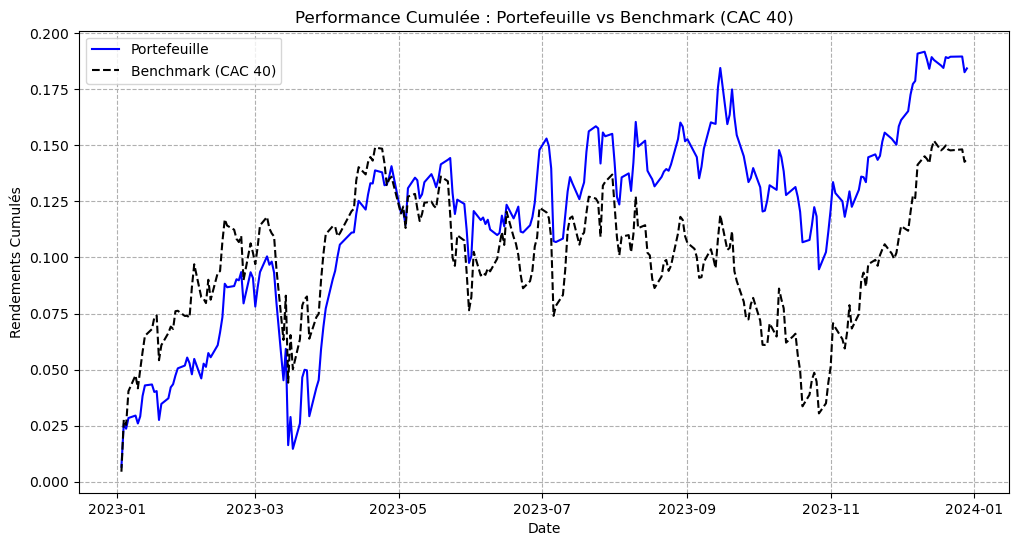

In [10]:
# Comparaison vs Benchmark

# Perf cumulées
plt.figure(figsize=(12, 6))
plt.plot(cumulative_portfolio_returns, label='Portefeuille', color='blue')
plt.plot(cumulative_benchmark_returns, label='Benchmark (CAC 40)', color='black', linestyle='--')
plt.title('Performance Cumulée : Portefeuille vs Benchmark (CAC 40)')
plt.xlabel('Date')
plt.ylabel('Rendements Cumulés')
plt.legend()
plt.grid(True, linestyle="--")
plt.show()

    Ticker  Contribution
0   TTE.PA      2.240185
1    BN.PA      2.188757
2   SAN.PA      1.831542
3   BNP.PA      2.915972
4  ENGI.PA      0.701459
5   ORA.PA      0.736198
6    MC.PA      3.749434
7    CS.PA      1.689556
8    OR.PA      0.155965
9   GLE.PA      0.665048

La somme des contributions est : 16.874114


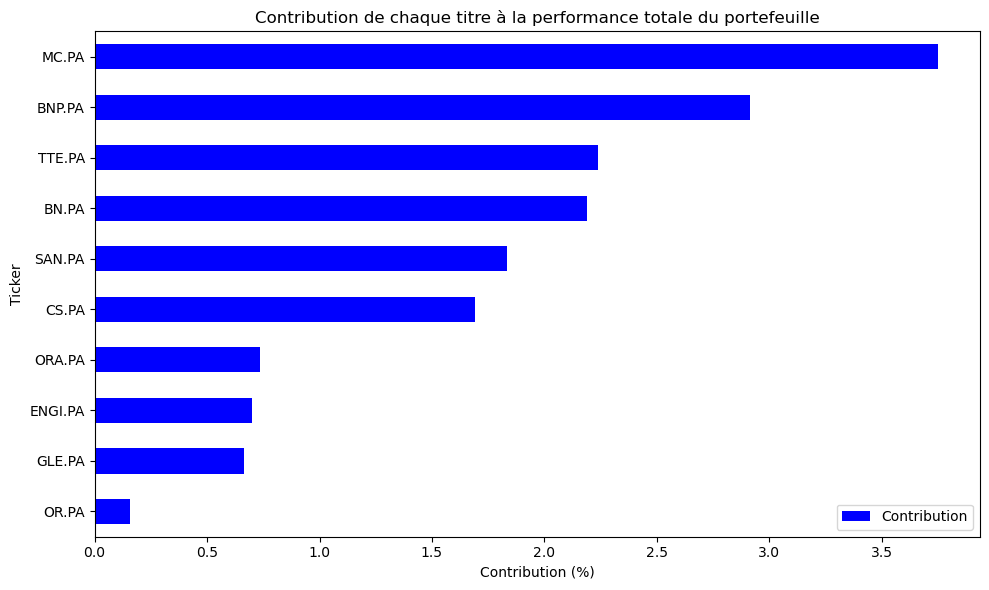

In [11]:
# Contribution de perf


# Ticker, Poids (%) et Performance Annuelle (%)
data = {
    'Ticker': ['TTE.PA', 'BN.PA', 'SAN.PA', 'BNP.PA', 'ENGI.PA', 'ORA.PA', 'MC.PA', 'CS.PA', 'OR.PA', 'GLE.PA'],
    'Poids (%)': [10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0],
    'Performance Annuelle (%)': [22.401846, 21.887567, 18.315422, 29.159721, 7.014585, 7.361982, 37.494335, 16.895555, 1.559654, 6.650475]
}

# Conversion en DataFrame
summary_df = pd.DataFrame(data)
summary_df['Contribution'] = (summary_df['Poids (%)'] / 100) * summary_df['Performance Annuelle (%)']
total_contribution = summary_df['Contribution'].sum()
print(summary_df[['Ticker', 'Contribution']])
print(f"\nLa somme des contributions est : {total_contribution:.6f}")

fig, ax = plt.subplots(figsize=(10, 6))
summary_df.sort_values('Contribution', ascending=True).plot(kind='barh', x='Ticker', y='Contribution', ax=ax, color='blue')
ax.set_title('Contribution de chaque titre à la performance totale du portefeuille')
ax.set_xlabel('Contribution (%)')
ax.set_ylabel('Ticker')
ax.grid(False)
plt.tight_layout()
plt.show()

# Composition de notre portefeuille

Notre portefeuille est composé des titres suivants :

| Ticker     | Entreprise       | Poids dans le portefeuille | Contribution (%) |
|------------|------------------|----------------------------|------------------|
| **TTE.PA** | TotalEnergies     | 10%                        | 2.2402          |
| **BN.PA**  | Danone           | 10%                        | 2.1888           |
| **SAN.PA** | Sanofi           | 10%                        | 1.8315           |
| **BNP.PA** | BNP Paribas      | 10%                        | 2.9160           |
| **ENGI.PA**| Engie            | 10%                        | 0.7015           |
| **ORA.PA** | Orange           | 10%                        | 0.7362           |
| **MC.PA**  | LVMH             | 10%                        | 3.7494           |
| **CS.PA**  | AXA              | 10%                        | 1.6896           |
| **OR.PA**  | L'Oréal          | 10%                        | 0.1560           |
| **GLE.PA** | Société Générale | 10%                        | 0.6650           |


**Poids total** : 100% investi en actions

**Période de placement** : 2023 - 2024 (Janv. vs Janv)

**Performance du portefeuille** : + 18.43 %

**Performance du benchmark** : + 14.38 %

# - Part II : Analyse Quantitative de la Performance Historique


In [12]:
# Corrected approach to backtest the portfolio with weights considered

tickers = ["TTE.PA", "BN.PA", "SAN.PA", "BNP.PA", "ENGI.PA", "ORA.PA", "MC.PA", "CS.PA", "OR.PA", "GLE.PA"]
weights = [0.10] * len(tickers)  # Assuming equal weighting, adjust if weights differ

# Risk-free rate for Sharpe Ratio
risk_free_rate = 0.01 / 252

[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


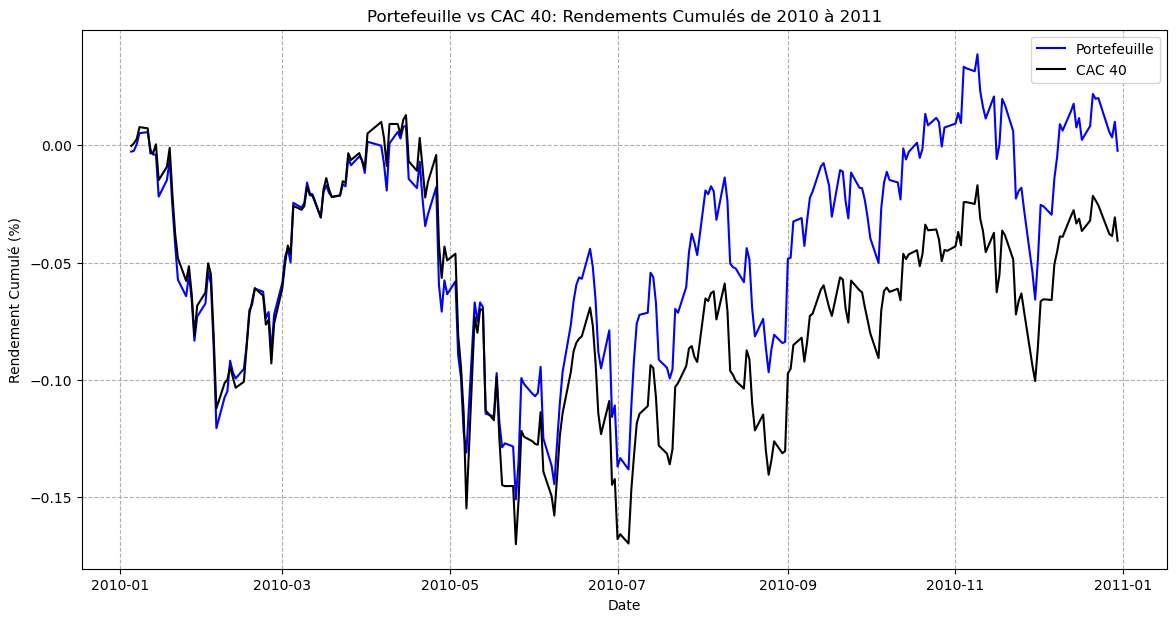

[**************        30%%                      ]  3 of 10 completed

Performance du Portefeuille de 2010 à 2011 : -0.23%
Performance du Benchmark (CAC 40) de 2010 à 2011 : -4.07%

Sharpe Ratio du Portefeuille de 2010 à 2011 : 0.06
Sharpe Ratio du Benchmark (CAC 40) de 2010 à 2011 : -0.10



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


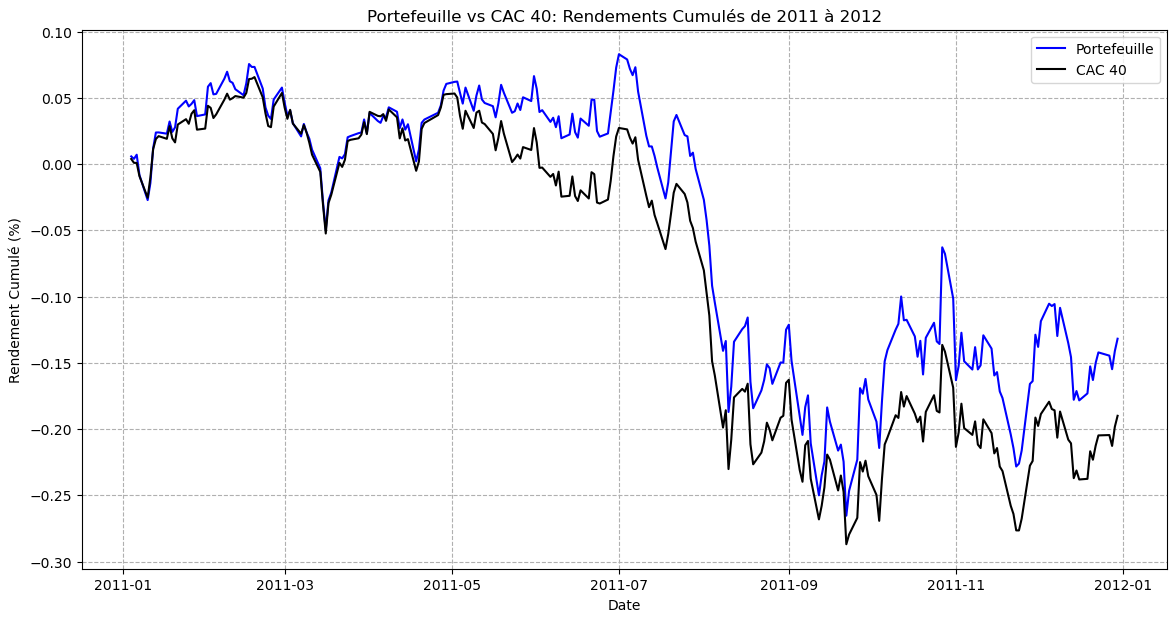

[**********************70%%********              ]  7 of 10 completed

Performance du Portefeuille de 2011 à 2012 : -13.18%
Performance du Benchmark (CAC 40) de 2011 à 2012 : -19.00%

Sharpe Ratio du Portefeuille de 2011 à 2012 : -0.32
Sharpe Ratio du Benchmark (CAC 40) de 2011 à 2012 : -0.62



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


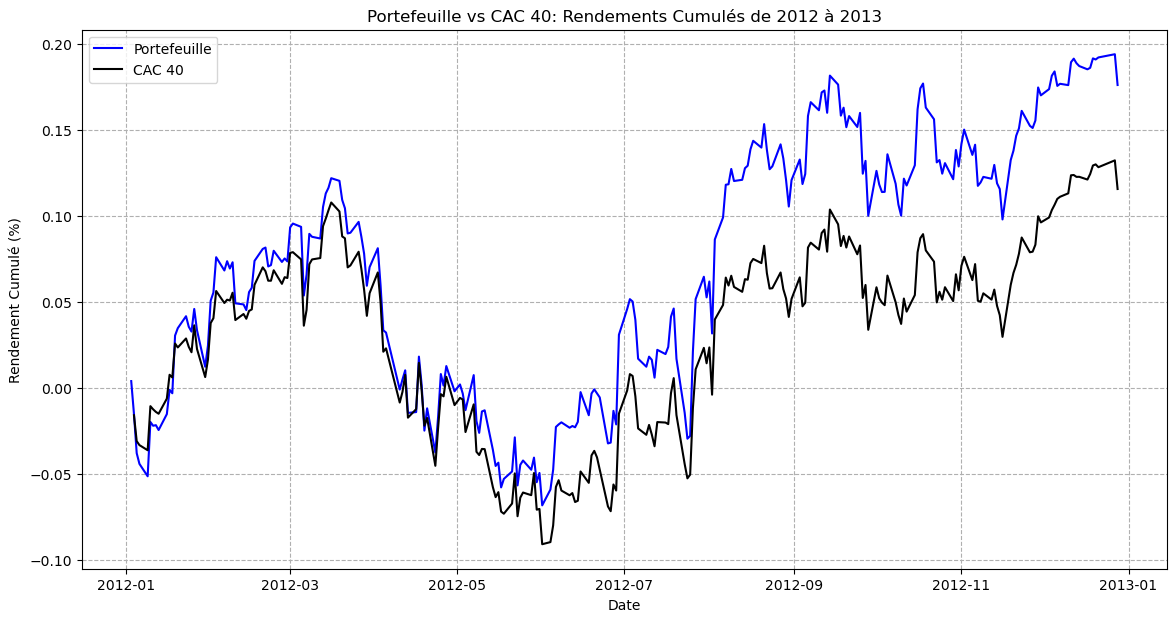

[**********************60%%***                   ]  6 of 10 completed

Performance du Portefeuille de 2012 à 2013 : 17.59%
Performance du Benchmark (CAC 40) de 2012 à 2013 : 11.55%

Sharpe Ratio du Portefeuille de 2012 à 2013 : 0.78
Sharpe Ratio du Benchmark (CAC 40) de 2012 à 2013 : 0.58



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


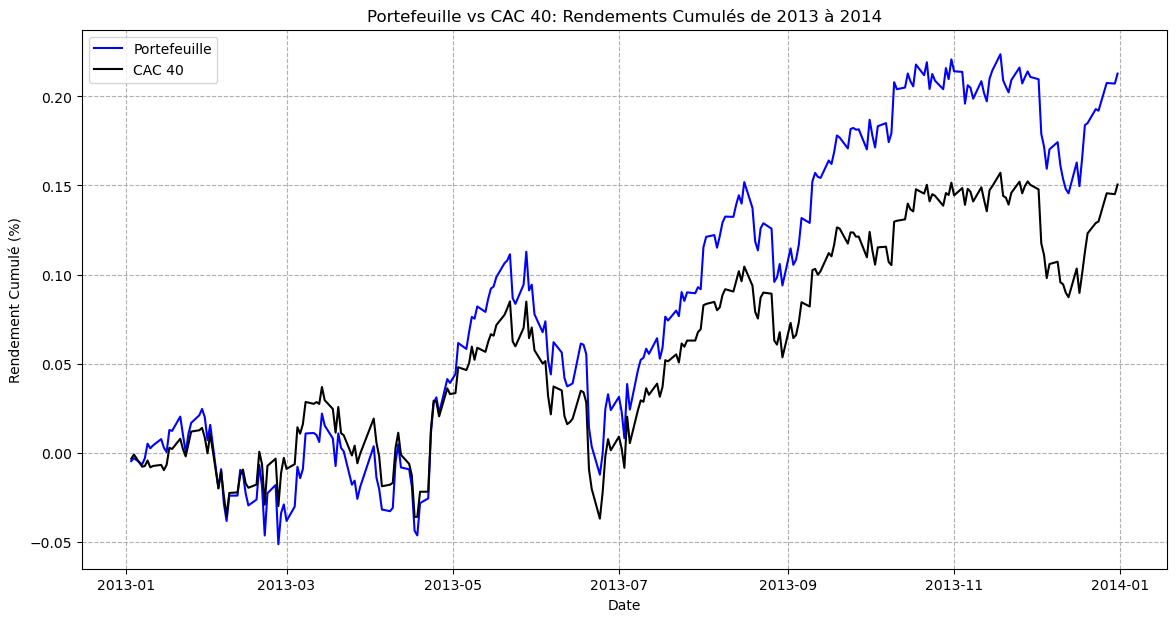

[**********************60%%***                   ]  6 of 10 completed

Performance du Portefeuille de 2013 à 2014 : 21.28%
Performance du Benchmark (CAC 40) de 2013 à 2014 : 15.05%

Sharpe Ratio du Portefeuille de 2013 à 2014 : 1.10
Sharpe Ratio du Benchmark (CAC 40) de 2013 à 2014 : 0.89



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


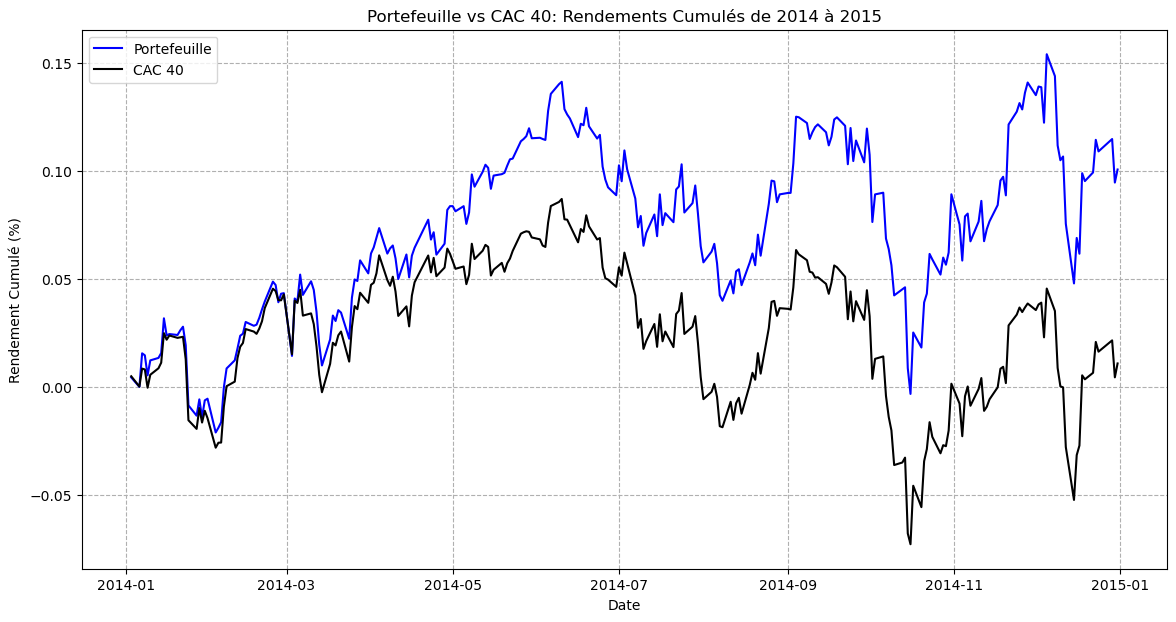

[**********************70%%********              ]  7 of 10 completed

Performance du Portefeuille de 2014 à 2015 : 10.06%
Performance du Benchmark (CAC 40) de 2014 à 2015 : 1.08%

Sharpe Ratio du Portefeuille de 2014 à 2015 : 0.59
Sharpe Ratio du Benchmark (CAC 40) de 2014 à 2015 : 0.08



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


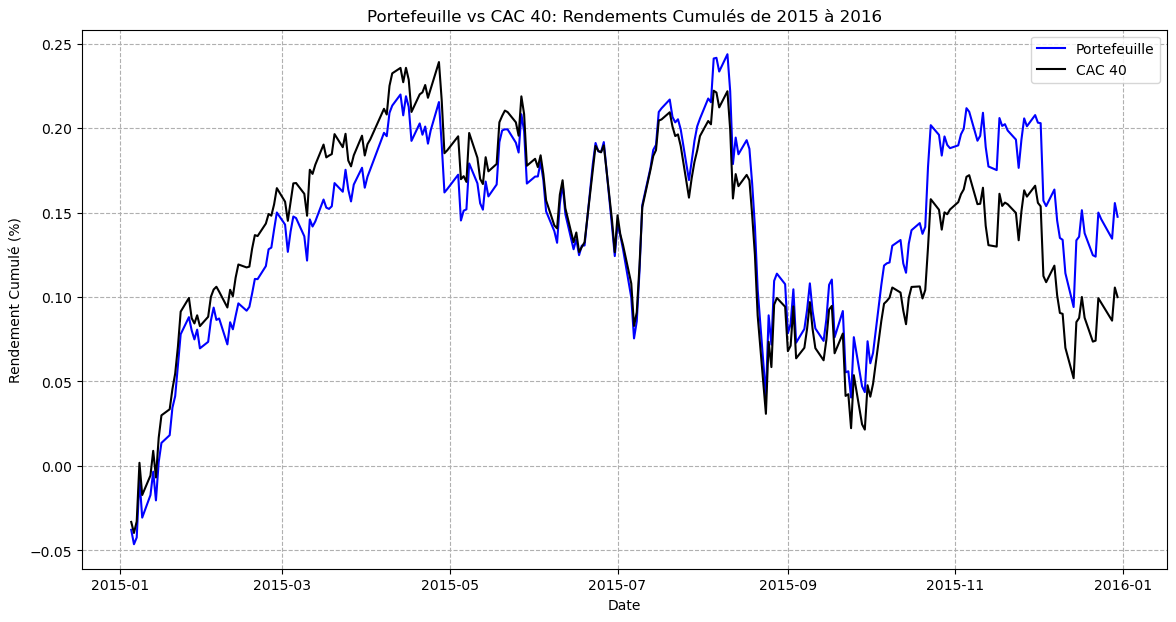

[**********************70%%********              ]  7 of 10 completed

Performance du Portefeuille de 2015 à 2016 : 14.75%
Performance du Benchmark (CAC 40) de 2015 à 2016 : 9.99%

Sharpe Ratio du Portefeuille de 2015 à 2016 : 0.65
Sharpe Ratio du Benchmark (CAC 40) de 2015 à 2016 : 0.49



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


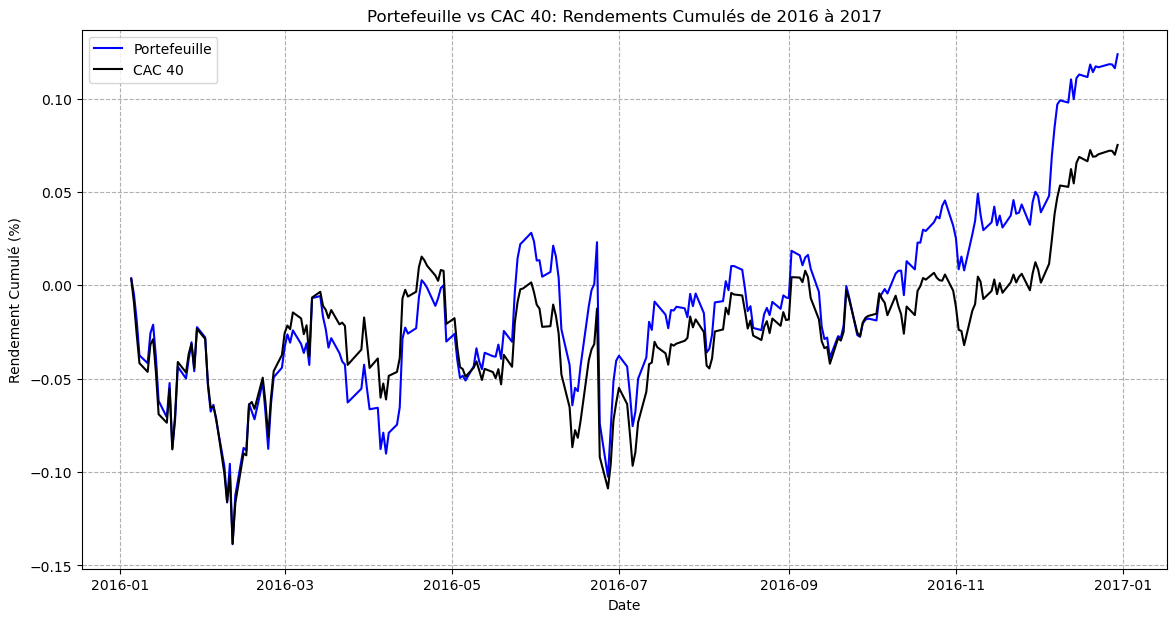

[**********************60%%***                   ]  6 of 10 completed

Performance du Portefeuille de 2016 à 2017 : 12.37%
Performance du Benchmark (CAC 40) de 2016 à 2017 : 7.51%

Sharpe Ratio du Portefeuille de 2016 à 2017 : 0.58
Sharpe Ratio du Benchmark (CAC 40) de 2016 à 2017 : 0.40



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


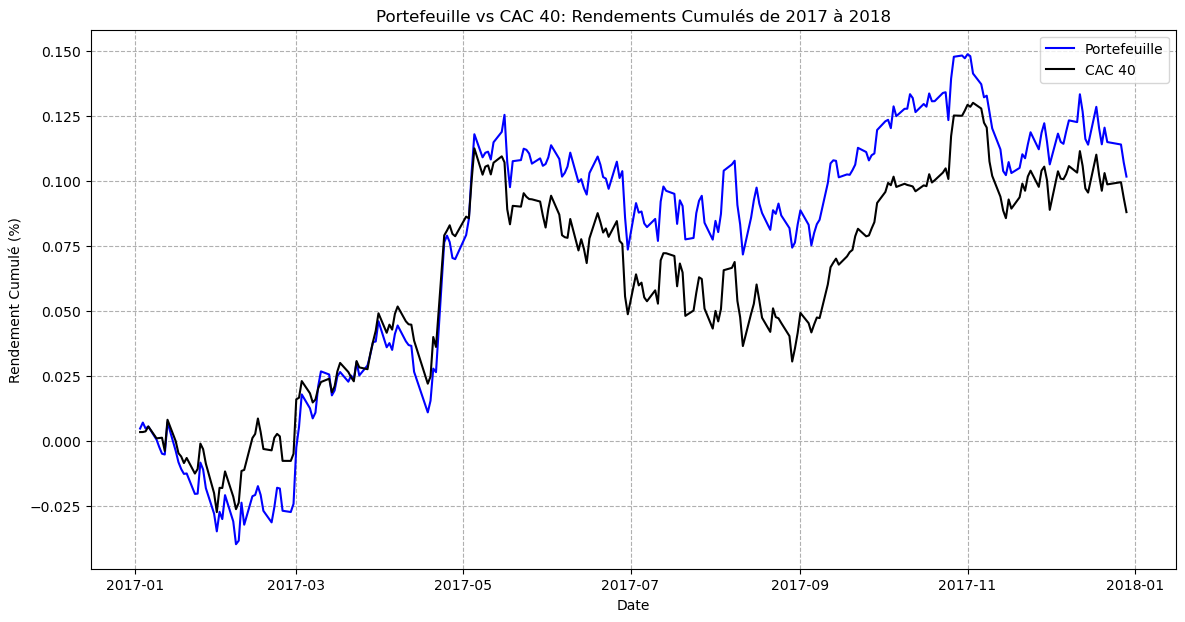

[**********************70%%********              ]  7 of 10 completed

Performance du Portefeuille de 2017 à 2018 : 10.18%
Performance du Benchmark (CAC 40) de 2017 à 2018 : 8.81%

Sharpe Ratio du Portefeuille de 2017 à 2018 : 0.82
Sharpe Ratio du Benchmark (CAC 40) de 2017 à 2018 : 0.75



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


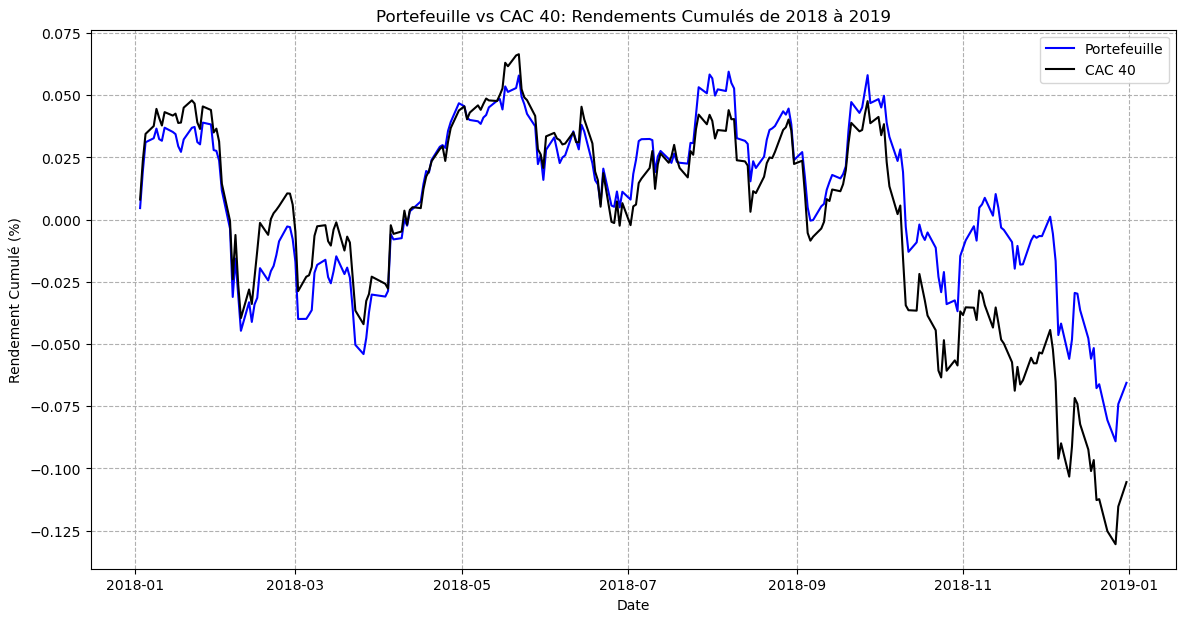

[**********************70%%********              ]  7 of 10 completed

Performance du Portefeuille de 2018 à 2019 : -6.56%
Performance du Benchmark (CAC 40) de 2018 à 2019 : -10.55%

Sharpe Ratio du Portefeuille de 2018 à 2019 : -0.54
Sharpe Ratio du Benchmark (CAC 40) de 2018 à 2019 : -0.81



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


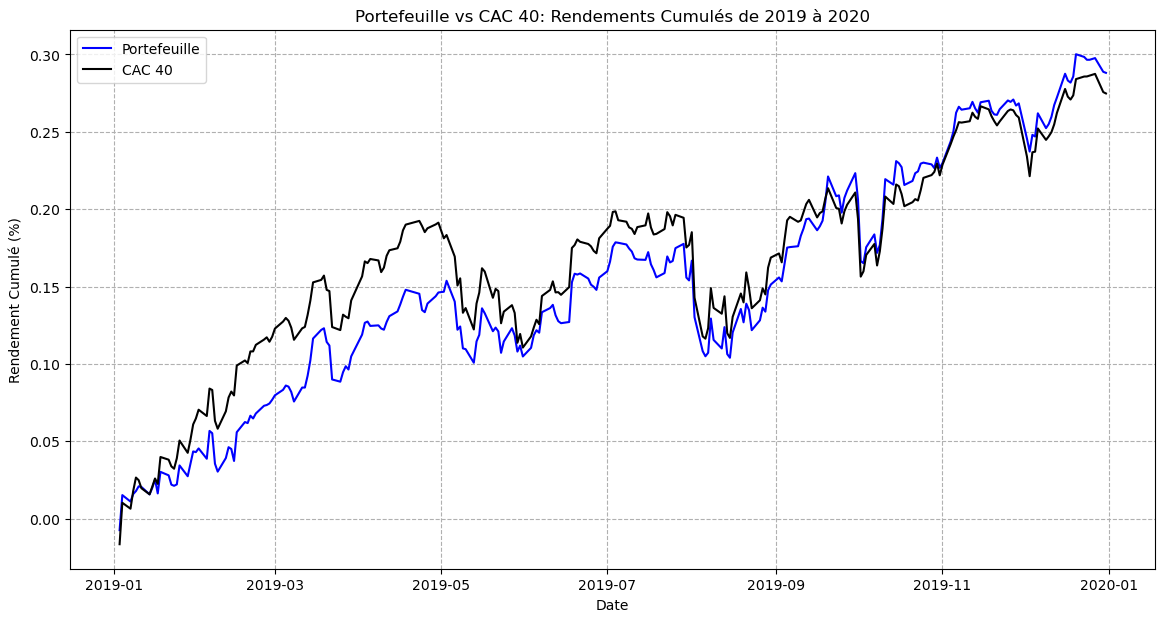

[**********************70%%********              ]  7 of 10 completed

Performance du Portefeuille de 2019 à 2020 : 28.81%
Performance du Benchmark (CAC 40) de 2019 à 2020 : 27.48%

Sharpe Ratio du Portefeuille de 2019 à 2020 : 2.00
Sharpe Ratio du Benchmark (CAC 40) de 2019 à 2020 : 1.81



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


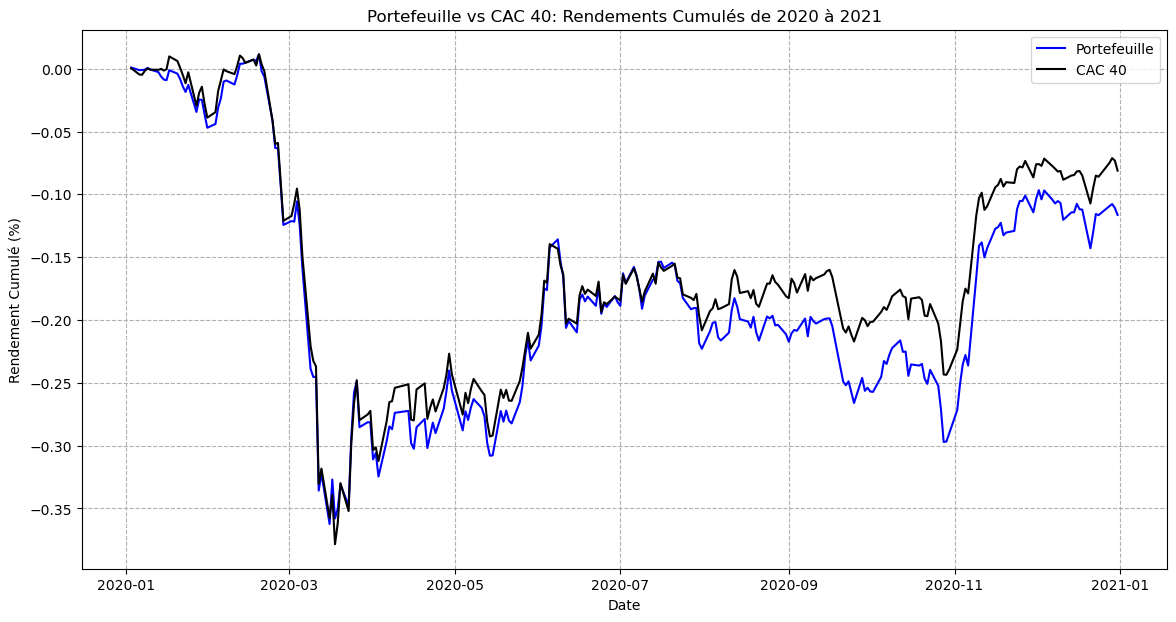

[**********************70%%********              ]  7 of 10 completed

Performance du Portefeuille de 2020 à 2021 : -11.64%
Performance du Benchmark (CAC 40) de 2020 à 2021 : -8.11%

Sharpe Ratio du Portefeuille de 2020 à 2021 : -0.22
Sharpe Ratio du Benchmark (CAC 40) de 2020 à 2021 : -0.12



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


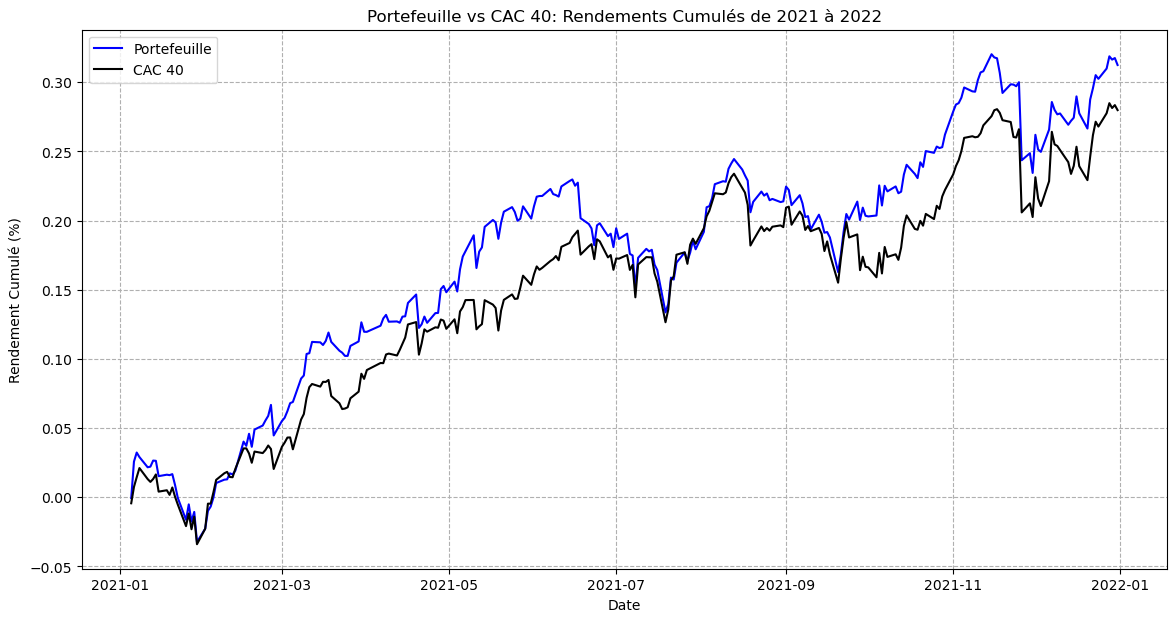

[**********************70%%********              ]  7 of 10 completed

Performance du Portefeuille de 2021 à 2022 : 31.25%
Performance du Benchmark (CAC 40) de 2021 à 2022 : 27.98%

Sharpe Ratio du Portefeuille de 2021 à 2022 : 1.95
Sharpe Ratio du Benchmark (CAC 40) de 2021 à 2022 : 1.73



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


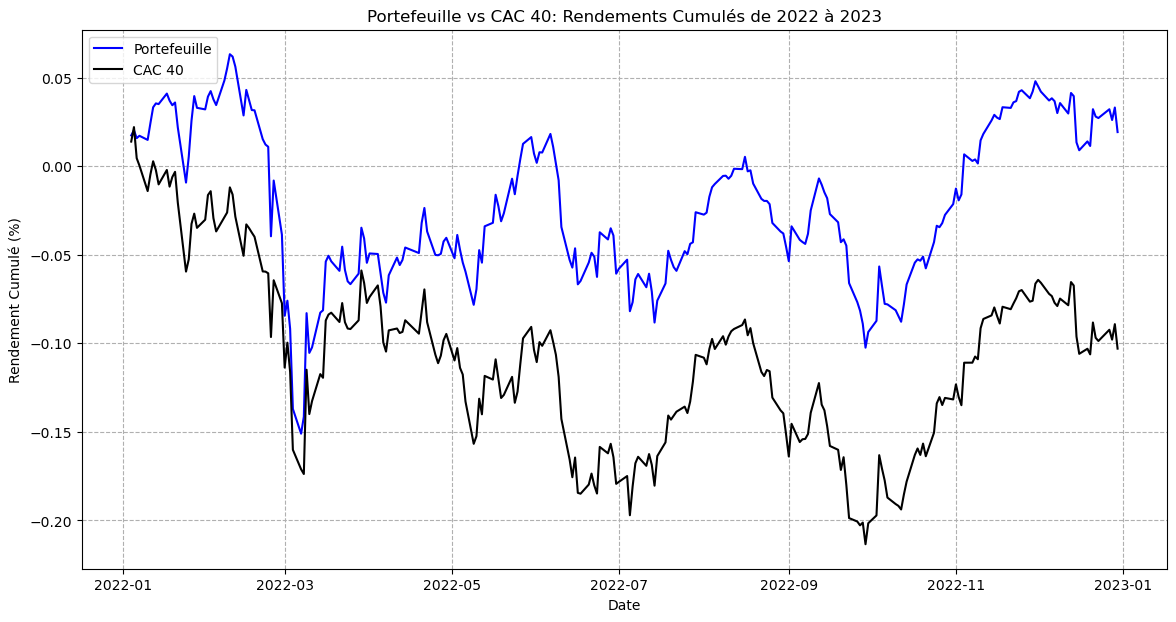

[*********************100%%**********************]  10 of 10 completed

Performance du Portefeuille de 2022 à 2023 : 1.92%
Performance du Benchmark (CAC 40) de 2022 à 2023 : -10.30%

Sharpe Ratio du Portefeuille de 2022 à 2023 : 0.14
Sharpe Ratio du Benchmark (CAC 40) de 2022 à 2023 : -0.41




[*********************100%%**********************]  1 of 1 completed


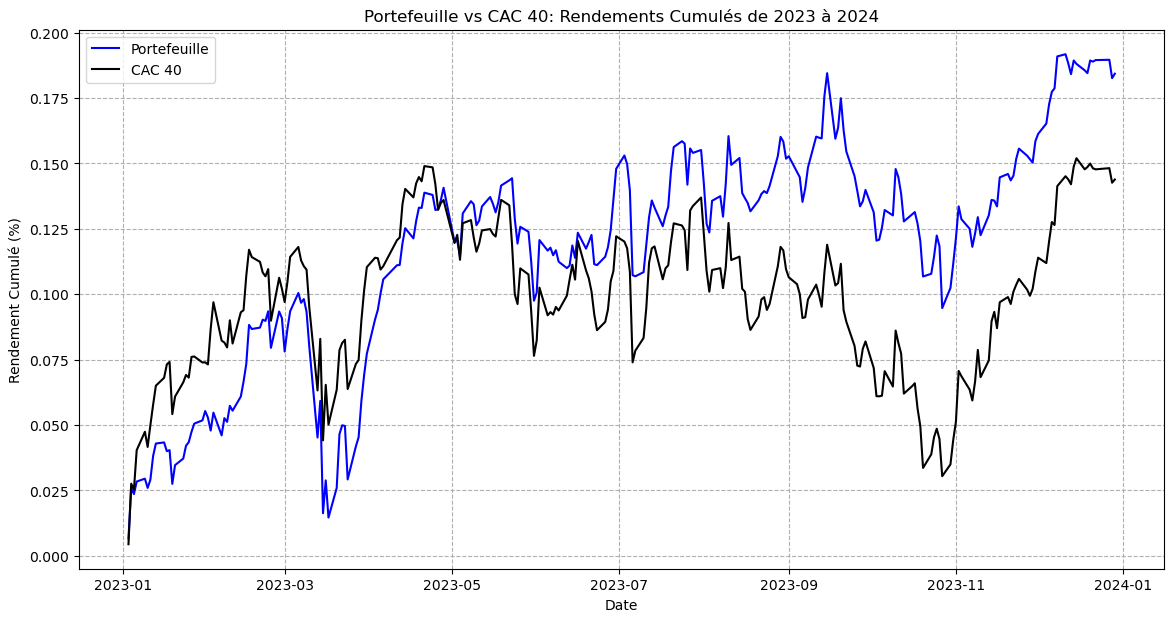

Performance du Portefeuille de 2023 à 2024 : 18.43%
Performance du Benchmark (CAC 40) de 2023 à 2024 : 14.38%

Sharpe Ratio du Portefeuille de 2023 à 2024 : 1.31
Sharpe Ratio du Benchmark (CAC 40) de 2023 à 2024 : 0.96



In [13]:
# Boucle permettant de visualiser les perfs du portefeuille vs benchmark sur 1 ans (base : janv-XX - janv XX+1)
for start_year in range(2010, 2024):
    end_year = start_year + 1
    
    # Étape 1: Télécharger les données historiques pour le portefeuille et le CAC 40 pour une période d'un an
    start_date = f"{start_year}-01-01"
    end_date = f"{end_year}-01-01"
    
    portfolio_data = yf.download(tickers, start=start_date, end=end_date, interval="1d")['Adj Close']
    benchmark_data = yf.download("^FCHI", start=start_date, end=end_date, interval="1d")['Adj Close']
    
    # Étape 2: Calculer les rendements journaliers pour chaque action du portefeuille
    portfolio_returns = portfolio_data.pct_change()
    
    # Étape 3: Calculer le rendement pondéré du portefeuille
    portfolio_weighted_return = portfolio_returns.dot(weights)
    
    # Étape 4: Calculer les rendements journaliers du benchmark (CAC 40)
    benchmark_returns = benchmark_data.pct_change()
    
    # Étape 5: Calculer les rendements cumulés pour le portefeuille et le benchmark
    portfolio_cumulative_return = (1 + portfolio_weighted_return).cumprod() - 1
    benchmark_cumulative_return = (1 + benchmark_returns).cumprod() - 1
    
    # Étape 6: Tracer les rendements cumulés pour comparaison
    plt.figure(figsize=(14, 7))
    plt.plot(portfolio_cumulative_return, label="Portefeuille", color="blue")
    plt.plot(benchmark_cumulative_return, label="CAC 40", color="black")
    plt.title(f"Portefeuille vs CAC 40: Rendements Cumulés de {start_year} à {end_year}")
    plt.xlabel("Date")
    plt.ylabel("Rendement Cumulé (%)")
    plt.legend()
    plt.grid(True, linestyle="--")
    plt.show()
    
    # Étape 7: Calculer et afficher la performance finale en pourcentage pour le portefeuille et le benchmark
    portfolio_performance_percent = portfolio_cumulative_return.iloc[-1] * 100
    benchmark_performance_percent = benchmark_cumulative_return.iloc[-1] * 100
    print(f"Performance du Portefeuille de {start_year} à {end_year} : {portfolio_performance_percent:.2f}%")
    print(f"Performance du Benchmark (CAC 40) de {start_year} à {end_year} : {benchmark_performance_percent:.2f}%\n")

    # Étape 8: Calculer la volatilité annuelle du portefeuille
    portfolio_volatility = portfolio_weighted_return.std() * np.sqrt(252)
    
    # Étape 9: Calculer la volatilité annuelle du benchmark
    benchmark_volatility = benchmark_returns.std() * np.sqrt(252)

    # Étape 10: Calculer le rendement annuel moyen du portefeuille
    portfolio_annual_return = portfolio_weighted_return.mean() * 252

    # Étape 11: Calculer le rendement annuel moyen du benchmark
    benchmark_annual_return = benchmark_returns.mean() * 252

    # Étape 12: Calculer le Ratio de Sharpe pour le portefeuille
    excess_portfolio_returns = portfolio_weighted_return - risk_free_rate
    sharpe_ratio_portfolio = (excess_portfolio_returns.mean() * 252) / portfolio_volatility

    # Étape 13: Calculer le Ratio de Sharpe pour le Benchmark (CAC 40)
    excess_benchmark_returns = benchmark_returns - risk_free_rate
    sharpe_ratio_benchmark = (excess_benchmark_returns.mean() * 252) / benchmark_volatility

    # Affichage des résultats
    print(f"Sharpe Ratio du Portefeuille de {start_year} à {end_year} : {sharpe_ratio_portfolio:.2f}")
    print(f"Sharpe Ratio du Benchmark (CAC 40) de {start_year} à {end_year} : {sharpe_ratio_benchmark:.2f}\n")

[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed
[*******************

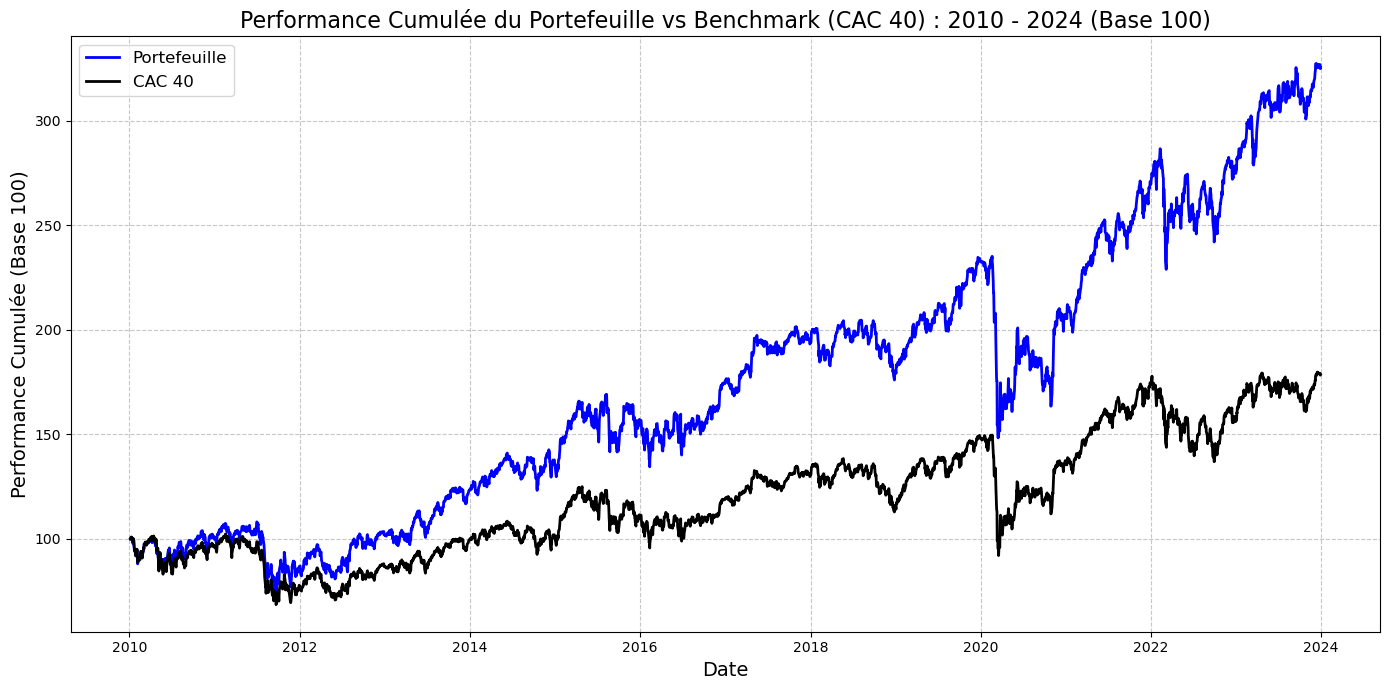

Performance Cumulée du Portefeuille de 2010 à 2024 : 325.46 (Base 100)
Performance Cumulée du Benchmark (CAC 40) de 2010 à 2024 : 178.48 (Base 100)


In [14]:
# Performance cumulée portefeuille vs bench : depuis 2010 

portfolio_cumulative_total = pd.Series(dtype=float)
benchmark_cumulative_total = pd.Series(dtype=float)

for start_year in range(2010, 2024):
    end_year = start_year + 1
    
    # Étape 1: Télécharger les données historiques pour le portefeuille et le benchmark
    start_date = f"{start_year}-01-01"
    end_date = f"{end_year}-01-01"
    
    portfolio_data = yf.download(tickers, start=start_date, end=end_date, interval="1d")['Adj Close']
    benchmark_data = yf.download("^FCHI", start=start_date, end=end_date, interval="1d")['Adj Close']
    
    # Étape 2: Calculer les rendements journaliers
    portfolio_returns = portfolio_data.pct_change().dropna()
    portfolio_weighted_return = portfolio_returns.dot(weights)
    benchmark_returns = benchmark_data.pct_change().dropna()
    
    # Étape 3: Calculer les rendements cumulés en base 100 pour chaque année
    if portfolio_cumulative_total.empty:
        portfolio_cumulative_total = 100 * (1 + portfolio_weighted_return).cumprod()  # Initialiser à 100
        benchmark_cumulative_total = 100 * (1 + benchmark_returns).cumprod()  # Initialiser à 100
    else:
        # Multiplier les rendements cumulés pour chaque année à partir du dernier point
        last_portfolio_value = portfolio_cumulative_total.iloc[-1]
        last_benchmark_value = benchmark_cumulative_total.iloc[-1]
        
        # Multiplier les rendements cumulés pour chaque année en maintenant la continuité
        new_portfolio_cumulative = last_portfolio_value * (1 + portfolio_weighted_return).cumprod()
        new_benchmark_cumulative = last_benchmark_value * (1 + benchmark_returns).cumprod()
        
        portfolio_cumulative_total = pd.concat([portfolio_cumulative_total, new_portfolio_cumulative])
        benchmark_cumulative_total = pd.concat([benchmark_cumulative_total, new_benchmark_cumulative])

# Performance cumulée de 2010 à 2024 en base 100
plt.figure(figsize=(14, 7))
plt.plot(portfolio_cumulative_total.index, portfolio_cumulative_total, label="Portefeuille", color="blue", linewidth=2)
plt.plot(benchmark_cumulative_total.index, benchmark_cumulative_total, label="CAC 40", color="black", linewidth=2)
plt.title("Performance Cumulée du Portefeuille vs Benchmark (CAC 40) : 2010 - 2024 (Base 100)", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Performance Cumulée (Base 100)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

final_portfolio_performance = portfolio_cumulative_total.iloc[-1]
final_benchmark_performance = benchmark_cumulative_total.iloc[-1]
print(f"Performance Cumulée du Portefeuille de 2010 à 2024 : {final_portfolio_performance:.2f} (Base 100)")
print(f"Performance Cumulée du Benchmark (CAC 40) de 2010 à 2024 : {final_benchmark_performance:.2f} (Base 100)")

In [15]:
# Boucle permettant de visualiser les perfs du portefeuille vs benchmark sur 1 ans (base : janv-XX - janv XX+1)
for start_year in range(2010, 2024):
    end_year = start_year + 1
 
    start_date = f"{start_year}-01-01"
    end_date = f"{end_year}-01-01"
    
    portfolio_data = yf.download(tickers, start=start_date, end=end_date, interval="1d")['Adj Close']
    benchmark_data = yf.download("^FCHI", start=start_date, end=end_date, interval="1d")['Adj Close']
    
    portfolio_returns = portfolio_data.pct_change()
    portfolio_weighted_return = portfolio_returns.dot(weights)
    benchmark_returns = benchmark_data.pct_change()
    portfolio_cumulative_return = (1 + portfolio_weighted_return).cumprod() - 1
    benchmark_cumulative_return = (1 + benchmark_returns).cumprod() - 1
    portfolio_performance_percent = portfolio_cumulative_return.iloc[-1] * 100
    benchmark_performance_percent = benchmark_cumulative_return.iloc[-1] * 100
    print(f"Performance du Portefeuille de {start_year} à {end_year} : {portfolio_performance_percent:.2f}%")
    print(f"Performance du Benchmark (CAC 40) de {start_year} à {end_year} : {benchmark_performance_percent:.2f}%\n")

[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  10 of 10 completed


Performance du Portefeuille de 2010 à 2011 : -0.23%
Performance du Benchmark (CAC 40) de 2010 à 2011 : -4.07%



[*********************100%%**********************]  1 of 1 completed
[**********************80%%************          ]  8 of 10 completed

Performance du Portefeuille de 2011 à 2012 : -13.18%
Performance du Benchmark (CAC 40) de 2011 à 2012 : -19.00%



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed
[**********************60%%***                   ]  6 of 10 completed

Performance du Portefeuille de 2012 à 2013 : 17.59%
Performance du Benchmark (CAC 40) de 2012 à 2013 : 11.55%



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed
[**********************60%%***                   ]  6 of 10 completed

Performance du Portefeuille de 2013 à 2014 : 21.28%
Performance du Benchmark (CAC 40) de 2013 à 2014 : 15.05%



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed
[**********************80%%************          ]  8 of 10 completed

Performance du Portefeuille de 2014 à 2015 : 10.06%
Performance du Benchmark (CAC 40) de 2014 à 2015 : 1.08%



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed
[**********************70%%********              ]  7 of 10 completed

Performance du Portefeuille de 2015 à 2016 : 14.75%
Performance du Benchmark (CAC 40) de 2015 à 2016 : 9.99%



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed
[**********************70%%********              ]  7 of 10 completed

Performance du Portefeuille de 2016 à 2017 : 12.37%
Performance du Benchmark (CAC 40) de 2016 à 2017 : 7.51%



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed
[**********************80%%************          ]  8 of 10 completed

Performance du Portefeuille de 2017 à 2018 : 10.18%
Performance du Benchmark (CAC 40) de 2017 à 2018 : 8.81%



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed
[**********************60%%***                   ]  6 of 10 completed

Performance du Portefeuille de 2018 à 2019 : -6.56%
Performance du Benchmark (CAC 40) de 2018 à 2019 : -10.55%



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed
[**********************70%%********              ]  7 of 10 completed

Performance du Portefeuille de 2019 à 2020 : 28.81%
Performance du Benchmark (CAC 40) de 2019 à 2020 : 27.48%



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed
[**********************90%%*****************     ]  9 of 10 completed

Performance du Portefeuille de 2020 à 2021 : -11.64%
Performance du Benchmark (CAC 40) de 2020 à 2021 : -8.11%



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  10 of 10 completed


Performance du Portefeuille de 2021 à 2022 : 31.25%
Performance du Benchmark (CAC 40) de 2021 à 2022 : 27.98%



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  10 of 10 completed


Performance du Portefeuille de 2022 à 2023 : 1.92%
Performance du Benchmark (CAC 40) de 2022 à 2023 : -10.30%



[*********************100%%**********************]  1 of 1 completed

Performance du Portefeuille de 2023 à 2024 : 18.43%
Performance du Benchmark (CAC 40) de 2023 à 2024 : 14.38%



In [16]:
# Paramètres du portefeuille
portfolio_performance = [
    -0.23, -13.18, 17.59, 21.28, 10.06, 14.75, 12.37, 10.18, -6.56, 28.81, -11.64, 31.25, 1.92, 18.43
]

# Paramètres du benchmark (CAC 40)
benchmark_performance = [
    -4.07, -19.00, 11.55, 15.05, 1.08, 9.99, 7.51, 8.81, -10.55, 27.48, -8.11, 27.98, -10.30, 14.38
]

# Calculate average portfolio performance
average_portfolio_performance = sum(portfolio_performance) / len(portfolio_performance)

average_portfolio_performance

9.645

In [17]:
# Investment parameters
initial_investment = 10000  # Montant initial en euros
monthly_contribution = 500  # Contribution mensuelle en euros
years = len(portfolio_performance)  # Nombre d'années de performance (2010-2024)
months = years * 12

# Convertir les performances annuelles en rendement mensuel
monthly_portfolio_performance = [(1 + (p / 100))**(1 / 12) - 1 for p in portfolio_performance]
monthly_benchmark_performance = [(1 + (p / 100))**(1 / 12) - 1 for p in benchmark_performance]

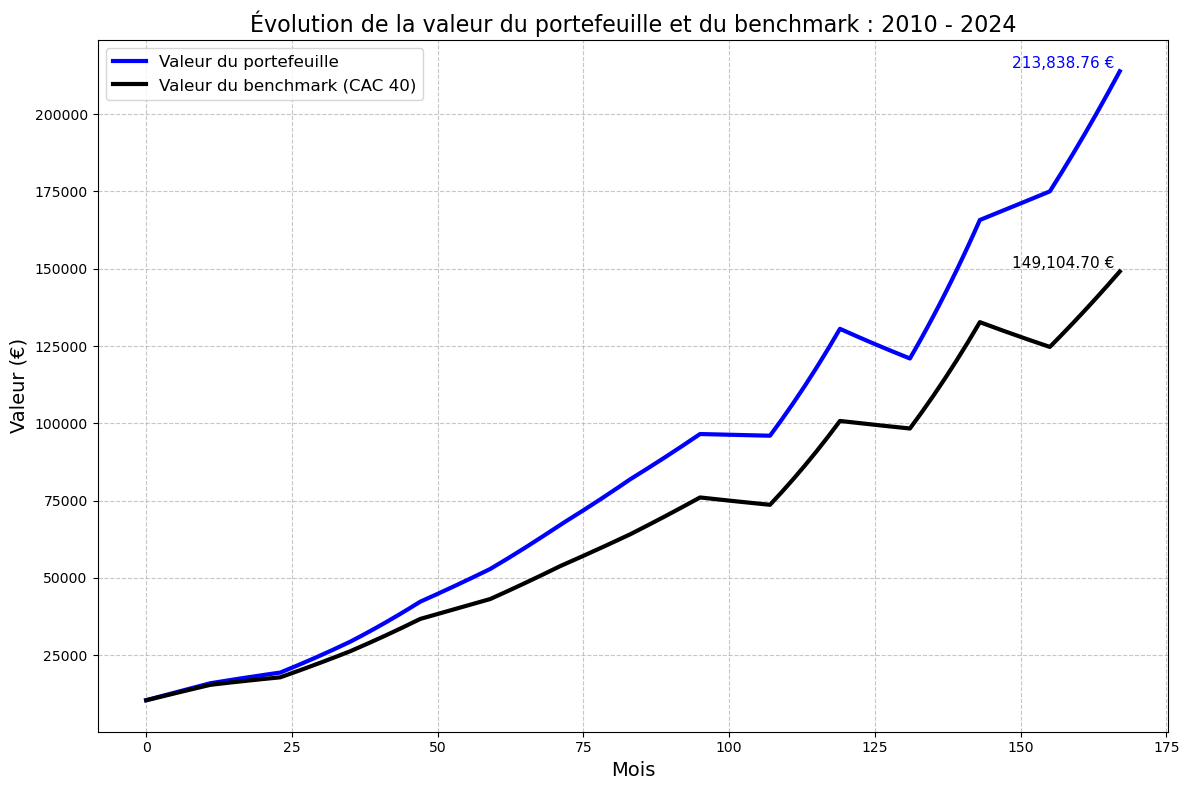

Valeur finale du portefeuille : 213838.76 €
Valeur finale du benchmark (CAC 40) : 149104.70 €


In [18]:
#PLOTING

portfolio_value = initial_investment
benchmark_value = initial_investment

portfolio_values = []
benchmark_values = []
time_periods = [] 

# Boucle pour calculer la valeur de l'investissement mois par mois
for i in range(len(monthly_portfolio_performance)):
    portfolio_annual_return = monthly_portfolio_performance[i]
    benchmark_annual_return = monthly_benchmark_performance[i]
    
    for month in range(12):
        # Valeur du portefeuille avec contribution mensuelle et rendement mensuel
        portfolio_value = (portfolio_value + monthly_contribution) * (1 + portfolio_annual_return)
        portfolio_values.append(portfolio_value)
        
        # Valeur du benchmark avec contribution mensuelle et rendement mensuel
        benchmark_value = (benchmark_value + monthly_contribution) * (1 + benchmark_annual_return)
        benchmark_values.append(benchmark_value)
        
        # Enregistrer la période (mois)
        time_periods.append(i * 12 + month)


# Visualisation des valeurs du portefeuille et du benchmark
plt.figure(figsize=(12, 8))
plt.plot(time_periods, portfolio_values, label='Valeur du portefeuille', color='blue', linewidth=3)
plt.plot(time_periods, benchmark_values, label='Valeur du benchmark (CAC 40)', color='black', linewidth=3)
plt.title("Évolution de la valeur du portefeuille et du benchmark : 2010 - 2024", fontsize=16)
plt.xlabel("Mois", fontsize=14)
plt.ylabel("Valeur (€)", fontsize=14)

plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=12)

final_portfolio_value = portfolio_values[-1]
plt.text(time_periods[-1] - 1 , portfolio_values[-1], f'{final_portfolio_value:,.2f} €', 
         color='blue', fontsize=11, verticalalignment='bottom', horizontalalignment='right')

final_benchmark_value = benchmark_values[-1]
plt.text(time_periods[-1] - 1 , benchmark_values[-1], f'{final_benchmark_value:,.2f} €', 
         color='black', fontsize=11, verticalalignment='bottom', horizontalalignment='right')

plt.tight_layout()
plt.show()
print(f"Valeur finale du portefeuille : {final_portfolio_value:.2f} €")
print(f"Valeur finale du benchmark (CAC 40) : {final_benchmark_value:.2f} €")